<a href="https://colab.research.google.com/github/MiningTheSkies/GPGN598B_full-waveform-modeling-across-scales/blob/main/GPGN_598B_HW1_Numerical_Modeling_Finite_Difference_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[//]: # (This is the HTML/CSS header block ... put all commands in here)
<style type="text/css">
<!--
 .tab { margin-left: 40px; }
 P { text-align:center }
-->
</style>

```
Course: GPGN 598B - Full Waveform Modelling Across Scales
Date: Feb. 2, 2020
```
# Homework: Numerical Modeling - Problem Set 1
---

## Finite Difference Method

The finite difference approximation of derivatives may be obtained by Taylor's expansion. The following is what you need in order to solve this problem set.

> $\partial_tT(x,t) \approx \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t}$ <br></br>
> $\partial^2_xT(x,t) \approx \frac{T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t)}{\Delta x^2}$

<br />

### 1 Heat Equation

The 1-D expression of the conservation of heat energy writes as:

> $p(x)\: c_p(x) \: \partial_tT(x,t)=-\partial_xq(x,t), \;\;\;\; x\in[0,L], \;\;\; t\in[0,+\infty),$

where $T(x,t)$ is the temperature field at the position $x$ at the instant $t$, $p(x)$ is the density, $c_p(x)$ is the specific heat at constant pressure, and $q(x,t)$ is the heat flux. The heat flux is related to the temperature through the Fourier's law of heat conduction:

> $q(x,t) = -k(x) \; \partial_x T(x,t)$,

where $k(x)$ is the thermal conductivity. The Fourier's law expresses the fact that the flow rate of heat energy is driven by the negative gradient of temperature across a surface.

The heat equation can thus be expressed as:

> $p(x)\; c_p(x)\; \partial_tT(x,t)=\partial_x[k(x)\; \partial_xT(x,t)]$.

If we further assume contant thermal properties, this equation rewrites as:

> $\partial_tT(x,t)=D\; \partial^2_xT(x,t)$,

When we have introduced $D\equiv \frac{k}{(pc_p)}$, the thermal diffusivity.

Use the finite difference approximation given above to solve the 1-D heat flow equation. You are strongly encouraged to write your code without the constant thermal properties assumption, keeping it general and allowing for heterogeneous material properties.

Consider a string of length $L=100$ with a spike of termperatures at $x=50$. The initial conditions are

> $T(x,0)=0 \;\;\;\; (x\neq50)$ <br></br>
> $T(x,0)=1 \;\;\;\; (x=50)$

The boundary condiions are:

> $T(0,t)\,=0 \;\;\;\; (t\in[0,+\infty))$ <br></br>
> $T(L,t)=0 \;\;\;\; (t\in[0,+\infty))$

The grid size defined by $\Delta x=\frac{L}{N-1}$, where $N$ is the number of nodes in the x-direction. In this problem, $\Delta x$ is chosen to be $1$. Plot the temperature field at different times, and experiment with four different time steps $\Delta t$:

$$
  \Delta t=0.4 \frac{\Delta x^2}{D},\;\;\;\;
  \Delta t=0.45 \frac{\Delta x^2}{D},\;\;\;\;
  \Delta t=0.55 \frac{\Delta x^2}{D},\;\;\;\;
  \Delta t=0.6 \frac{\Delta x^2}{D},\;\;\;\;
$$

### Answer for Part 1
---


In [1]:
# ----- Import Libraries -----

import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# ----- Define the environment -----

D = 1                           # constant - define the thermal diffusivity
L = 100                         # space - total length of object
N = 101                         # space - total distance nodes
dx = L/(N-1)                    # space - change in distance between each node
x = np.linspace(0, L, N)        # space - defines the mesh

t = np.linspace(0, L, N)                            # time - defines the mesh
dt_options = np.array([0.4, 0.45, 0.55, 0.6])       # time - the various timestep choices available
dt = dt_options * dx**2 / D                         # time - defines an array of timesteps

# F = D*dt/dx**2                  # constant - define the mesh Fourier number

T0 = 0                          # temp - initial temperature
T_L = T_R = 0                   # temp - (L)eft and (R)ight boundary temperatures
T_spike = 1                     # temp - initial temperature spike
T_cur = np.zeros(N)             # temp - temperature at the current time (already calculated)
T_new = np.zeros(N)             # temp - temperature at the next time (to be calculated)

# initialize mesh temperature with temperature spike at the 1/2 way place (in this case, 50)
T_cur[:50] = T_cur[51:] = T0
T_cur[50] = T_spike

solution_space      = np.zeros((len(dt),N,N))       # initialize the solution space (which will hold all values for all time iterations)
solution_space[:,:,0] = T_cur                       # apply the initial temperatures to the solution space at t=0 for the first dt option (dt=0.45)

for q in range(len(dt)):
    for i in range(1, N):
        for j in range(1, N-1):
            T_new[j]  = D * (dt[q] / dx**2) * (T_cur[j-1] - 2*T_cur[j] +  T_cur[j+1]) + T_cur[j]
        
        T_new[0]  = T_L
        T_new[-1] = T_R
        T_cur[:] = T_new
        solution_space[q,:,i] = T_new
    
    T_cur[:50] = T_cur[51:] = T0
    T_cur[50] = T_spike
    T_new = np.zeros(N)
    q += 1

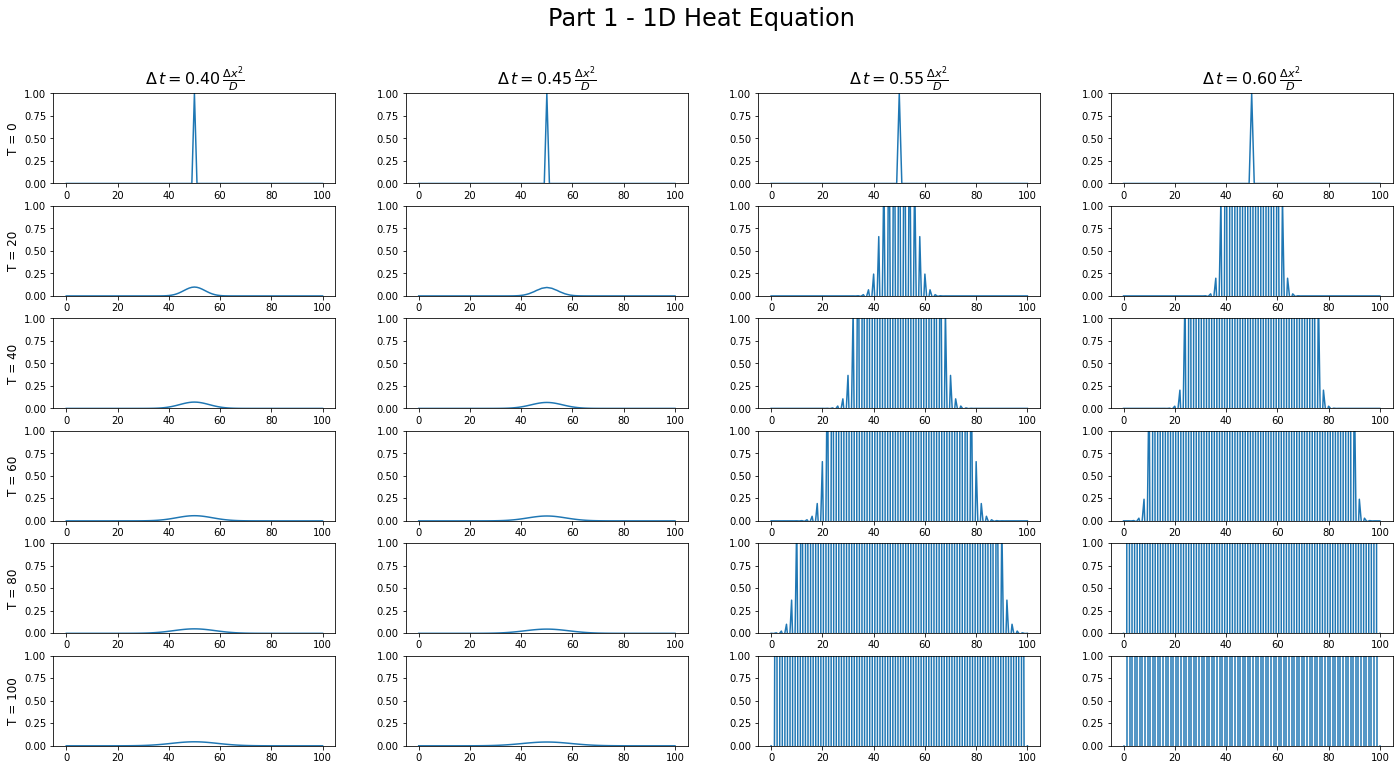

In [3]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Part 1 - 1D Heat Equation', fontsize=24)

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space[col,:,row*20])
        plt.ylim(T0,T_spike)
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()